## Plot 3d vectors

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

def animateVector(funcs, names, t0, tn):
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta']
    index = 0

    fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

    def draw(func, theta):
        r = func(theta)
        if(len(r) == 3):
            u, v, w = r
            return 0, 0, 0, u, v, w
        return r

    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)

    def update(theta):
        global quivers
        for quiver in quivers:
            if(quiver is not None):
                quiver.remove()
        quivers = []
        index = 0
        for func in funcs:
            quiver = ax.quiver(*draw(func, theta))
            quiver.set_color(colors[index % len(colors)])
            quiver.set_label(names[index])
            index += 1
            quivers.append(quiver)

    global quivers
    quivers = [None] * len(funcs)
    update(t0)

    ani = FuncAnimation(fig, update, frames=np.linspace(t0,tn,200), interval=50)
    ax.legend()
    ax.grid(True, which='both')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ani.save("vector_animation.mp4", writer='ffmpeg', fps=30)
    plt.show()
def f1(t):
    return [cos(t), sin(t), 0]
def f2(t):
    return [0, cos(t), sin(t)]

# animateVector([f1, f2], ["f1", "f2"], 0, 4 * pi)
# a = [[1, 2, 3], [4, 5, 6]]
# print(a)
# X, Y, Z, U, V, W = zip(*a)

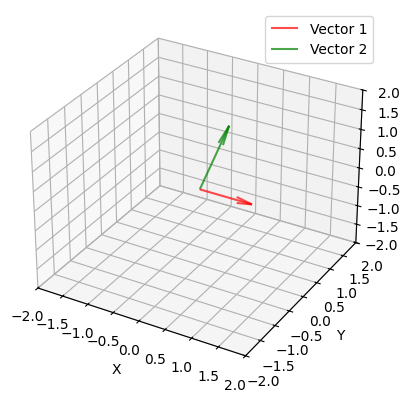

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

class VectorChart:
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'magenta']
    index = 0
    def __init__(self):
        self.fig, self.ax = plt.subplots(subplot_kw=dict(projection="3d"))
        self.ax.set_xlim(-2, 2)
        self.ax.set_ylim(-2, 2)
        self.ax.set_zlim(-2, 2)
        self.ax.grid(True, which='both')
        self.ax.set_xlabel("X")
        self.ax.set_ylabel("Y")
        self.ax.set_zlabel("Z")
    def drawVector(self, vector, name):
        plt.ion()
        vector = list(vector)
        if(len(vector) == 3): vector = [0, 0, 0] + vector
        quiver = self.ax.quiver(*zip(vector))
        quiver.set_label(name)
        quiver.set_color(VectorChart.colors[self.index % len(self.colors)])
        quiver.set_alpha(0.7)
        self.index += 1
    def show(self):
        plt.legend()
        plt.show()
vc = VectorChart()
vc.drawVector([1, 0, 0], "Vector 1")
vc.drawVector([0, 1, 1], "Vector 2")
vc.show()

# Fizyka - bryła sztywna


## Rotation by differential


Propeties of vectors in cylindric cordinates:


$$
\vec{i}_z = \vec{i}_\rho \times \vec{i}_\varphi \\
\vec{i}_\rho = \vec{i}_\varphi \times \vec{i}_z \\
\vec{i}_\varphi = \vec{i}_z \times \vec{i}_\rho
$$

Assuming ratation around one axis : $ \overrightarrow{\omega } =  \frac{d \varphi }{d x} \overrightarrow{i_z}  $

Limits of derivatives of versors:
$$ \varDelta \overrightarrow{i_r} \longrightarrow \overrightarrow{i_\varphi }  \varDelta \varphi \\
\frac{d \overrightarrow{i_r}}{dt} = \overrightarrow{i_\varphi }  \left\lvert \omega \right\rvert = \overrightarrow{i_r} \times \overrightarrow{\omega} $$

$$ \varDelta \overrightarrow{i_\varphi} \longrightarrow \overrightarrow{i_r }  \varDelta \varphi \\
\frac{d \overrightarrow{i_\varphi}}{dt} = \overrightarrow{i_r }  \left\lvert \omega \right\rvert = \overrightarrow{i_\varphi} \times \overrightarrow{\omega}  $$

$$ \frac{d \overrightarrow{i_z}}{dt} = 0 $$

When rotation is around multiple axes:
$$ \overrightarrow{\omega} = \left[ \omega_z,  \omega_r, \omega_\varphi \right] $$

We have multiple components in each limit, all the previous equasions will work acordingly:

$$ \frac{d \overrightarrow{i_\varphi}}{dt} = \overrightarrow{i_\varphi} \times \overrightarrow{\omega_z} + \overrightarrow{i_\varphi} \times \overrightarrow{\omega_r} + \overrightarrow{i_\varphi} \times \overrightarrow{\omega_\varphi} =  \overrightarrow{i_\varphi} \times \overrightarrow{\omega}  $$

Note that $ \overrightarrow{\omega_\varphi} \times \overrightarrow{\omega_\varphi} = 0 $. Similarly:
$$
\frac{d \overrightarrow{i_r}}{dt} = \overrightarrow{i_r} \times \overrightarrow{\omega}
\frac{d \overrightarrow{i_z}}{dt} = \overrightarrow{i_z} \times \overrightarrow{\omega}
$$

Hence, by vector decomposition, any vector can be defined with the following:
$$
\frac{d \overrightarrow{u}}{dt} = \overrightarrow{u} \times \overrightarrow{\omega}
$$

In [181]:
ITER = int(1e4)
EPS = 1e-12
def rotate_lim(a : np.array, w : np.array, t : float):
    a += np.cross(w*t, a)
    return a

def rotate(a : np.array, b : np.array, t : float):
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)
    t=float(t)
    # Rotacja EPS a wokół osi b o kąt t
    for i in range(ITER):
        a = rotate_lim(a, b, t/ITER)
    return a

a = np.array([0, 1, 0], dtype=float)
b = np.array([0, 0 ,1], dtype=float)

for i in range(100):
    a = rotate_lim(a, b, pi/200)
print(a)

a = np.array([0, 1, 0])

print(rotate(a, b, pi/2))

[-1.01241187e+00  1.30776985e-04  0.00000000e+00]
[-1.00012338e+00  1.29208767e-08  0.00000000e+00]


## Rotation by plane cast

When rotating around vector, you rotate on a plane created by that vector by a specific angle. Any remainder that is parallel to the rotation vector will stay the same.
As such, first one must caluclate the vector cast onto the plane.

### Vector cast by plane transformation

If we define the vector space by

$$
\vec{i}_0 = \vec{\omega}  \\
\vec{i}_1 = \vec{\omega}  \times \vec{u}  \\
\vec{i}_2 = \vec{\omega}  \times \vec{i}_1
$$

then transforming the vector space $ V_0 = \vec{i}_x, \vec{i}_y, \vec{i}_z $ to $ V_\omega = \vec{i}_0, \vec{i}_1, \vec{i}_2 $ will give us the vector cast in question.

Transfroming $ V_\omega $ to $ V_0 $ is very easy, as we just need to multiply by the matrix $ \begin{bmatrix} \vec{i}_0 & \vec{i}_1 & \vec{i}_2 \end{bmatrix} $ with $ \vec{i}_n $  being a columnd vector of its coorfinates in $ V_0 $. Transforming $ V_0 $ to $ V_\omega $ is just the inverse matrix.

FInally, in order to rotate we just need to rotate the composite vectors $ \vec{i}_1 $ and $ \vec{i}_2 $ using trigonometric functions cos and sin.


In [182]:
def rotate2(a : np.array, w : np.array, t : float = 1.0):
    if(np.linalg.norm(w) < EPS):
        return a
    u = np.array([w[1], w[2], w[0]])
    i1 = np.cross(w, u)
    i2 = np.cross(w, i1)

    if(t==1): t = np.linalg.norm(w)
    i0 = w / np.linalg.norm(w)
    i1 = i1 / np.linalg.norm(i1)
    i2 = i2 / np.linalg.norm(i2)
    
    Mw0 = np.array([
        [i0[0], i1[0], i2[0]],
        [i0[1], i1[1], i2[1]],
        [i0[2], i1[2], i2[2]]
    ])
    M0w = np.linalg.inv(Mw0)
    M = np.array([
        [1, 0, 0],
        [0, cos(t), -sin(t)],
        [0, sin(t), cos(t)]
    ])
    # print("i0, i1, i2:")
    # print(i0, i1, i2, sep='\n')
    # print("Mw0, M0w, M:")
    # print(Mw0, M0w, M, sep='\n')
    # print(M0w @ a)
    # print( M @ M0w @ a)
    return Mw0 @ M @ M0w @ a


w = np.array([1, 0, 1], dtype=float)
a = np.array([0, 0 ,1], dtype=float)


rotate2(a, w, pi/2)    

array([ 0.5       , -0.70710678,  0.5       ])

### Relative gyroscope

Finally we are ready to implement the relative gyroscope. The sensors from our device will return the angular speed of the device relative to the device. We will need to rotate them to the absolute (starting) position and then rotate it back to the starting position.

#### Storing orientation

The orientation will be stored as two vectors $ \vec{o}_x $ and $ \vec{o}_y $ that start at the $ \vec{i}_x $ and $ \vec{i}_y $ and are rotated by $ \omega $.

#### Angle between vectors

In order to get the rotation necesarry to rotate $ \vec{u} $ onto $ \vec{v} $ we need to take the cross product of their versors : $ \vec{\psi} = \vec{i}_u \times \vec{i}_v $, which by definition is perpendicular to both of them, and as such it's rotation plane will include both vectors. The angle of rotation is, by definition of cross product, $ \arcsin \vec{\psi} $.

#### Absolute rotation from relative rotation

All we need to do in order to obtain the absolute angular speed $ \vec{\omega_0}  $ is to rotate the relative $ \vec{\omega_r}  $ along rotating $ \vec{o}_x $ to $ \vec{i}_x $ and $ \vec{o}_y $ to $ \vec{i}_y $.


In [183]:
def rotationVector(a : np.array, b : np.array, paralellDefault : np.array = [1, 0, 0]) -> np.array:
    """
    Zwraca wektor rotacji z wektora a do wektora b, o długości równej kątowi.
    """
    if np.all(a == b):
        return np.zeros(3)
    
    
    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)
    p = np.cross(a, b)
    #Check if paralel
    if np.linalg.norm(p) < EPS:
        #check if they face same direction
        if np.dot(a, b) > 0:
            return np.zeros(3)
        return paralellDefault / np.linalg.norm(paralellDefault) * pi
    # print(p)
    l = np.linalg.norm(p)
    #If facing opposite directions, return pi - asin
    if np.dot(a, b) < 0:
        return p / l * (pi - asin(l))

    return p / l * asin(l) 


a = np.array([0, 0 ,1], dtype=float)
w = np.array([1, 0, 1], dtype=float)

c = rotate2(a, w, pi/2)    
print(c)
rot = rotationVector(a, c)
print(rot)
print(np.linalg.norm(rot))



[ 0.5        -0.70710678  0.5       ]
[ 0.85503322  0.60459979 -0.        ]
1.0471975511965976


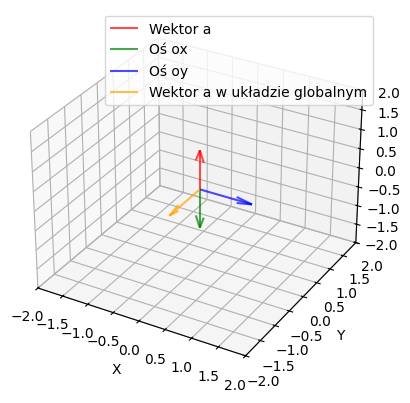

In [201]:

def relativeToAbsolute(ox : np.array, oy : np.array, a : np.array):
    """
    Przekształca wektor a z układu współrzędnych zdefiniowanego przez
    oś ox i oś oy do układu współrzędnych globalnego.
    """
    ix = np.array([1, 0, 0], dtype=float)
    iy = np.array([0, 1, 0])

    r1 = rotationVector(ox, ix)
    # print("r1:", r1)
    oy_ = rotate2(oy, r1)
    ox_ = rotate2(ox, r1)
    # vc.drawVector(ox_, "Oś ox po rotacji")
    # vc.drawVector(oy_, "Oś oy po rotacji")
    # vc.drawVector(a, "Wektor a po rotacji")
    r2 = rotationVector(oy_, iy, paralellDefault=ox_)
    ox_2 = rotate2(ox_, r2)
    oy_2 = rotate2(oy_, r2)
    # vc.drawVector(ox_2, "Oś ox po drugiej rotacji")
    # vc.drawVector(oy_2, "Oś oy po drugiej rotacji")
    # vc.drawVector(r2, "Wektor rotacji r2")
    a = rotate2(a, -r2)
    a = rotate2(a, -r1)
    return a

# a = np.array([1, 0, 2], dtype=float)
# ox = np.array([-1, 1, 0], dtype=float)
# oy = np.array([1, 1, 0], dtype=float)
# v = relativeToAbsolute(ox, oy, a)

# print("a:", a)
# print("v:", v)
# vc.drawVector(a, "Wektor a")
# vc.drawVector(ox, "Oś ox")
# vc.drawVector(oy, "Oś oy")
# vc.drawVector(v, "Wektor a w układzie globalnym")
# vc.show()


vc = VectorChart()

ox = np.array([0, 0, -1])
oy = np.array([1, 0, 0])

a = np.array([0, 0, 1])
v = relativeToAbsolute(ox, oy, a)

vc.drawVector(a, "Wektor a")
vc.drawVector(ox, "Oś ox")
vc.drawVector(oy, "Oś oy")
vc.drawVector(v, "Wektor a w układzie globalnym")
vc.show()

In [185]:
rotationVector(np.array([2, 0, 0]), np.array([1, 0, 0]), paralellDefault=np.array([0, 0, 1]))

array([0., 0., 0.])

ox[100]: [1. 0. 0.]
oy[100]: [0.00000000e+00 2.75482495e-16 1.00000000e+00]
ox: [-7.31972843e-16  4.23733277e-17  1.00000000e+00]
oy: [ 1.52267882e-16  1.00000000e+00 -6.22761822e-16]


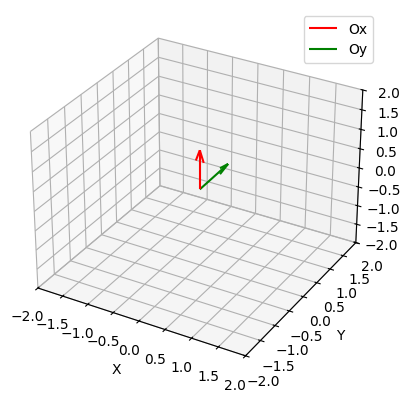

In [205]:
N = 300

t = [pi/200 for i in range(N)]
w_x0 = [1 for i in range(100)]
w_y0 = [0 for i in range(100)]
w_z0 = [0 for i in range(100)]

w_x1 = [0 for i in range(100)]
w_y1 = [0 for i in range(100)]
w_z1 = [1 for i in range(100)]

w_x2 = [-1 for i in range(100)]
w_y2 = [0 for i in range(100)]
w_z2 = [0 for i in range(100)]

w_x = w_x0 + w_x1 + w_x2
w_y = w_y0 + w_y1 + w_y2
w_z = w_z0 + w_z1  + w_z2

w = [np.array([w_x[i], w_y[i], w_z[i]]) for i in range(N)]

wAbs = []

def calcAbsoluteRotation(w, t):
    """
    Zwraca wektor orientacji bryły na podstawie względnej prędkości obrotowej oraz dt.
    """
    ox = [np.array([1, 0, 0])]
    oy = [np.array([0, 1, 0])]

    for i in range(N):
        w_abs = relativeToAbsolute(ox[-1], oy[-1], w[i])
        global wAbs
        wAbs.append(w_abs)
        ox.append(rotate2(ox[-1], w_abs, t[i]))
        oy.append(rotate2(oy[-1], w_abs, t[i]))
    return ox, oy

ox, oy = calcAbsoluteRotation(w, t)

def updateX(i):
    global ox
    i = int(i)
    return ox[i]

def updateY(i):
    global oy
    i = int(i)
    return oy[i]

def updateW(i):
    global wAbs
    i = int(i)
    return wAbs[i]
print("ox[100]:", ox[100])
print("oy[100]:", oy[100])

print("ox:", ox[-1])
print("oy:", oy[-1])

animateVector([updateX, updateY], ["Ox", "Oy"], 0, N-1)


